# Whole Milk Promotion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 1. EDA

In [2]:
# Load the grocery data
groceries = pd.read_csv('Groceries.csv')

In [3]:
# Inspect the data
groceries.head()

,Customer,Item
0,1,citrus fruit
1,1,margarine
2,1,ready soups
3,1,semi-finished bread
4,2,coffee


In [4]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43367 entries, 0 to 43366
Data columns (total 2 columns):
Customer    43367 non-null int64
Item        43367 non-null object
dtypes: int64(1), object(1)
memory usage: 677.7+ KB


### Visualize the distribution of the number of distinct items in each customer’s market basket

(array([2.159e+03, 1.643e+03, 1.299e+03, 1.005e+03, 8.550e+02, 6.450e+02,
        5.450e+02, 4.380e+02, 3.500e+02, 2.460e+02, 1.820e+02, 1.170e+02,
        7.800e+01, 7.700e+01, 5.500e+01, 4.600e+01, 2.900e+01, 1.400e+01,
        1.400e+01, 9.000e+00, 1.100e+01, 4.000e+00, 6.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.     ,  1.03125,  2.0625 ,  3.09375,  4.125  ,  5.15625,
         6.1875 ,  7.21875,  8.25   ,  9.28125, 10.3125 , 11.34375,
        12.375  , 13.40625, 14.4375 , 15.46875, 16.5    , 17.53125,
        18.5625 , 19.59375, 20.625  , 21.65625, 22.6875 , 23.71875,
        24.75   , 25.78125, 26.8125 , 27.84375, 28.875  , 29.90625,
        30.9375 , 31.96875, 33.     ]),
 <a list of 32 Patch objects>)

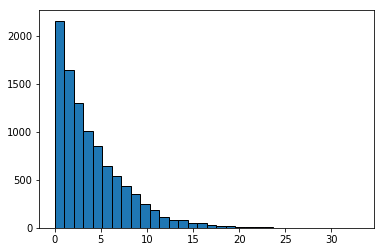

In [6]:
# Create a dataset which contains the number of distinct items in eachcustomer’s market basket.
n_items = groceries.groupby('Customer').size()

# Plot the histogram
plt.hist(n_items, range=(0, 33), bins=32, edgecolor='black')

In [7]:
# Five summary statistics
print("Statistics of number of items purchased by all customers:")
print(n_items.describe())

Statistics of number of items purchased by all customers:
count    9835.000000
mean        4.409456
std         3.589385
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        32.000000
dtype: float64


## 2. Use apriori algorithm to find k-itemsets which can be found in the market baskets of at least seventy five (75) customers.

In [9]:
# Calculate the frequency table
freq_table = pd.Series.sort_index(pd.Series.value_counts(n_items))
print('Frequency of Number of Items Purchase')
print(freq_table)

# Convert the Sale Receipt data to the Item List format
item_list = groceries.groupby(['Customer'])['Item'].apply(list).values.tolist()

# Convert the Item List format to the Item Indicator format
te = TransactionEncoder()
te_ary = te.fit(item_list).transform(item_list)
item_indicator = pd.DataFrame(te_ary, columns=te.columns_)

# Find the frequent itemsets
frequent_itemsets = apriori(item_indicator, min_support=75/len(item_list), max_len=32, \
                            use_colnames=True)
print("Number of itemsets that has at least 75 customers:", len(frequent_itemsets))
print("The largest k value among the itemsets:", len(np.max(frequent_itemsets['itemsets'])))

Frequency of Number of Items Purchase
1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
18      14
19      14
20       9
21      11
22       4
23       6
24       1
26       1
27       1
28       1
29       3
32       1
dtype: int64
Number of itemsets that has at least 75 customers: 524
The largest k value among the itemsets: 4


## 3. Discover the association rules

In [10]:
# Discover the association rules
assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
print("the lift statistics of the association rules with 1% confidence:")
print(assoc_rules['lift'].describe())
print("Number of empty anteceents:", sum(assoc_rules['antecedents'].isnull()))
print("Number of empty consequents:", sum(assoc_rules['consequents'].isnull()))

the lift statistics of the association rules with 1% confidence:
count    1228.000000
mean        1.832335
std         0.582243
min         0.445664
25%         1.418258
50%         1.744861
75%         2.189610
max         4.152546
Name: lift, dtype: float64
Number of empty anteceents: 0
Number of empty consequents: 0


### Plot Support metrics on the vertical axis against the Confidence metrics

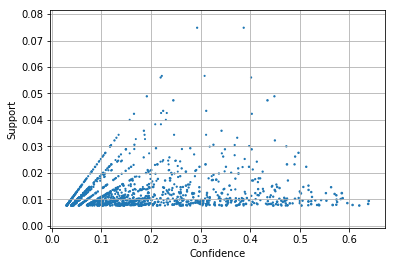

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(assoc_rules['confidence'], assoc_rules['support'], s=assoc_rules['lift'])
plt.grid(True)
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.show()

### List the rules whose Confidence metrics are at least 60%

the lift statistics of the association rules with 60% confidence:


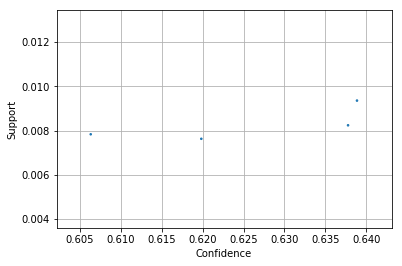

In [12]:
# Find the frequent itemsets
frequent_itemsets = apriori(item_indicator, min_support=75/len(item_list), max_len=32, use_colnames=True)

# Discover the association rules
assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("the lift statistics of the association rules with 60% confidence:")
assoc_rules['lift'].describe()

plt.figure(figsize=(6,4))
plt.scatter(assoc_rules['confidence'], assoc_rules['support'], s=assoc_rules['lift'])
plt.grid(True)
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.show()


## Association rules that lead to the purchase of whole milk

In [13]:
print(assoc_rules)

                                   antecedents   consequents  \
0                    (butter, root vegetables)  (whole milk)   
1                             (butter, yogurt)  (whole milk)   
2  (other vegetables, yogurt, root vegetables)  (whole milk)   
3   (other vegetables, tropical fruit, yogurt)  (whole milk)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.012913            0.255516  0.008236    0.637795  2.496107   
1            0.014642            0.255516  0.009354    0.638889  2.500387   
2            0.012913            0.255516  0.007829    0.606299  2.372842   
3            0.012303            0.255516  0.007626    0.619835  2.425816   

   leverage  conviction  
0  0.004936    2.055423  
1  0.005613    2.061648  
2  0.004530    1.890989  
3  0.004482    1.958317  
